In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

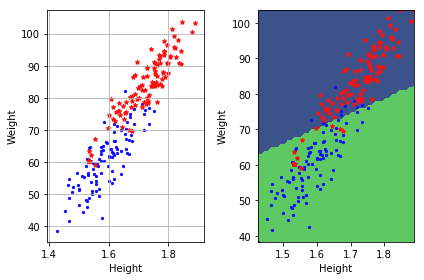

In [3]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    mse, w = least_squares(y, tx)
    # w = least squares with respect to tx

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [4]:
def sigmoid(t):
    """apply sigmoid function on t."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    return 1/(1+np.exp(-t))

In [5]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    loss = 0
    for i in range(0, len(y)):
        loss = loss + np.log(1 + np.exp(np.dot(tx[i,:],w)))- y[i]*np.dot(tx[i,:].T,w)
    return loss

In [6]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    sig = sigmoid(np.dot(tx,w))
    return np.dot(tx.T,sig - y)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [7]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the cost: TODO
    # ***************************************************
    loss = calculate_loss(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the gradient: TODO
    # ***************************************************
    gradient = calculate_gradient(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w = w - gamma*gradient
    return loss, w

Demo!

(200, 3) (3, 1) (200, 1)
Current iteration=0, loss=[ 138.62943611]
Current iteration=100, loss=[ 43.46403231]
Current iteration=200, loss=[ 41.54589281]
Current iteration=300, loss=[ 41.09863897]
Current iteration=400, loss=[ 40.96487064]
Current iteration=500, loss=[ 40.92008946]
Current iteration=600, loss=[ 40.90418744]
Current iteration=700, loss=[ 40.89834995]
Current iteration=800, loss=[ 40.89616497]
Current iteration=900, loss=[ 40.89533753]
Current iteration=1000, loss=[ 40.89502196]
Current iteration=1100, loss=[ 40.89490109]
Current iteration=1200, loss=[ 40.89485466]
Current iteration=1300, loss=[ 40.8948368]
Current iteration=1400, loss=[ 40.89482992]
Current iteration=1500, loss=[ 40.89482727]
loss=[ 40.89482664]


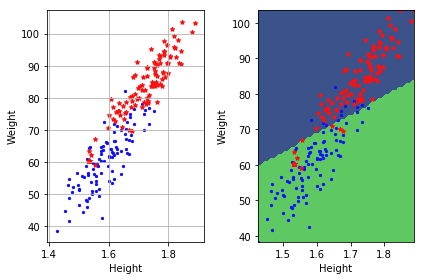

In [8]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))
    print(tx.shape,w.shape,y.shape)
    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [9]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate hessian: TODO
    # ***************************************************
    S = np.zeros(len(y))
    for i in range(0,len(y)):
        S[i] = sigmoid(np.dot(tx[i,:],w))*sigmoid(1-np.dot(tx[i,:],w))
    S = np.diag(S)
    hessian = np.dot(np.dot(tx.T, S),tx)
    return hessian
    

Write a function below to return loss, gradient, and hessian.

In [10]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    # ***************************************************
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    
    return loss, gradient, hessian

### Using Newton's method
Use Newton's method for logistic regression.

In [11]:
def learning_by_newton_method(y, tx, w):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and hessian: TODO
    # ***************************************************
    loss, gradient, hessian = logistic_regression(y, tx, w)
    w = w - np.dot(np.linalg.inv(hessian),gradient)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    return loss, w

demo

Current iteration=0, the loss=[ 138.62943611]
Current iteration=1, the loss=[ 77.57858515]
Current iteration=2, the loss=[ 58.83030881]
Current iteration=3, the loss=[ 49.68868521]
Current iteration=4, the loss=[ 45.01208448]
Current iteration=5, the loss=[ 42.68710688]
Current iteration=6, the loss=[ 41.60911899]
Current iteration=7, the loss=[ 41.15465053]
Current iteration=8, the loss=[ 40.98205899]
Current iteration=9, the loss=[ 40.92239849]
Current iteration=10, the loss=[ 40.90319755]
Current iteration=11, the loss=[ 40.8973059]
Current iteration=12, the loss=[ 40.89555006]
Current iteration=13, the loss=[ 40.89503553]
Current iteration=14, the loss=[ 40.89488618]
Current iteration=15, the loss=[ 40.89484304]
Current iteration=16, the loss=[ 40.89483062]
Current iteration=17, the loss=[ 40.89482705]
Current iteration=18, the loss=[ 40.89482602]
Current iteration=19, the loss=[ 40.89482573]
Current iteration=20, the loss=[ 40.89482564]
Current iteration=21, the loss=[ 40.89482562

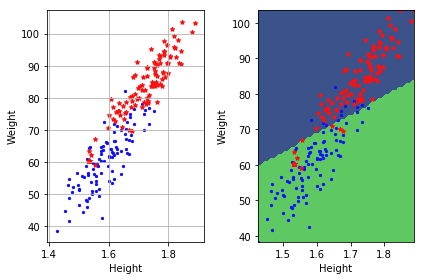

In [12]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [19]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    # ***************************************************
    loss = calculate_loss(y, tx, w) + lambda_*w.T.dot(w)
    gradient = calculate_gradient(y,tx,w) + 2*lambda_*w
    return loss, gradient

In [20]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient: TODO
    # ***************************************************
    loss, gradient = penalized_logistic_regression(y, tx, w, lambda_)
    w = w - gamma*gradient
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************

    return loss, w

Current iteration=0, loss=[[ 138.62943611]]
Current iteration=100, loss=[[ 46.07607269]]
Current iteration=200, loss=[[ 45.13699081]]
Current iteration=300, loss=[[ 45.0281699]]
Current iteration=400, loss=[[ 45.01325693]]
Current iteration=500, loss=[[ 45.01109478]]
Current iteration=600, loss=[[ 45.01077474]]
Current iteration=700, loss=[[ 45.010727]]
Current iteration=800, loss=[[ 45.01071985]]
loss=[ 41.80587009]


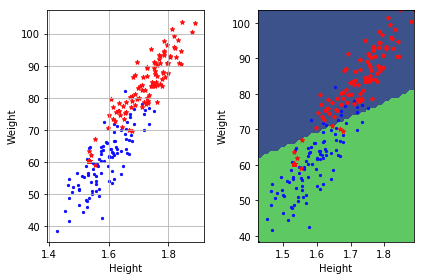

In [21]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)